In [108]:
import numpy as np
import tensorflow as tf
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os


## Exploring dataset

In [109]:
dataset = pd.read_csv('../data/HAM10000_metadata.csv')

In [117]:
copy_metadata = dataset.copy()
copy_metadata = copy_metadata.sort_values('image_id')
metadata_slim = copy_metadata[['image_id', 'dx']]
metadata_slim.reset_index(drop=True, inplace=True)
metadata_slim

In [129]:
label_dict = { 
    'akiec': 0,'bcc': 1,'bkl': 2,'df': 3,'nv': 4,
    'vasc': 5,
    'mel':6
}

In [130]:
metadata_labels = metadata_slim.replace(label_dict)
metadata_labels

,image_id,dx
0,ISIC_0024306,4
1,ISIC_0024307,4
2,ISIC_0024308,4
3,ISIC_0024309,4
4,ISIC_0024310,6
...,...,...
10010,ISIC_0034316,6
10011,ISIC_0034317,6
10012,ISIC_0034318,2
10013,ISIC_0034319,4


In [125]:
metadata_slim[:1000].dx.value_counts()

nv       685
bkl      111
mel       91
bcc       52
akiec     36
vasc      14
df        11
Name: dx, dtype: int64

## Preprocess one image

In [76]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image

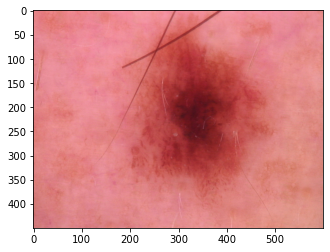

In [77]:
original_image = image.load_img('../data/HAM10000_images_part_1/ISIC_0024306.jpg')
plt.imshow(original_image)

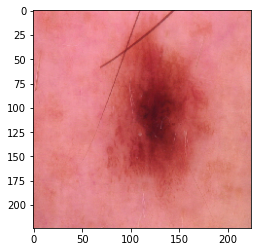

In [78]:
target_size=(224, 224)
path = '../data/HAM10000_images_part_1/ISIC_0024306.jpg'
resized_image = image.load_img(path, target_size=target_size)
plt.imshow(resized_image)

In [84]:
type(resized_image)

PIL.Image.Image

In [85]:
image_array = image.img_to_array(resized_image)

In [86]:
type(resized_image)

PIL.Image.Image

In [96]:
image_array.shape

(224, 224, 3)

In [97]:
image_array_reshaped = image_array.reshape((1, image_array.shape[0], image_array.shape[1], image_array.shape[2]))
image_array_reshaped.shape

(1, 224, 224, 3)

In [99]:
prepared_image = preprocess_input(image_array_reshaped)

## Preprocessing training images

In [ ]:
def get_preprocessed_images(images_directory: str, image_size: tuple) -> list:
    images = []
    for img in os.listdir(images_directory):
        img = image.load_img(images_directory+img, target_size=image_size)
        img = image.img_to_array(img)
        img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        images.append(img)
    return np.vstack(images)

## Import pretrained model

In [106]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

In [107]:
# Make a model object. Make sure you include the top as well!
model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224,224,3))